# Exercise 6
### Gradient descent

In [12]:
f0 = lambda x: 2*x**2 - 0.5
df0 = lambda x: 4*x
f1 = lambda x: 2*x**4 - 4*x**2  + x - 0.5
df1 = lambda x: 8*x**3 - 8*x + 1

init0 = [3]
init1 = [-2, -0.5, 0.5, 2]

stop_criterion = 1e-4

In [13]:
def GradDescent (x_0, f, df, stop_criterion=1e-4, alpha=0.1, beta=0.1):
    x = x_0
    steps = 0
    while(abs(df(x)) > stop_criterion):
        stepsize = 1
        while(f(x - stepsize * df(x))> f(x) - alpha*stepsize*df(x)*df(x)):
            stepsize = stepsize * beta
        x = x - stepsize * df(x)
        steps = steps + 1
    return x, steps

## (a) Solve the first exercise

In [14]:
sol0GD = GradDescent(init0[0], f0, df0, stop_criterion=stop_criterion, alpha=0.1, beta=0.5)
print(sol0GD) # x = error, since x* = 0

(0.0, 1)


## Plots on the armijo wolfe parameters for the line search

Mean result with alpha=0.1 is 26.161616161616163
Mean result with alpha=0.2 is 19.272727272727273
Mean result with alpha=0.3 is 16.363636363636363
Mean result with alpha=0.4 is 15.464646464646465


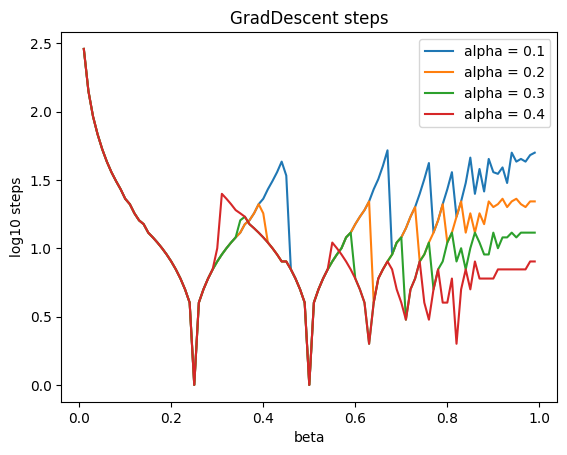

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plotSomeSteps(alphas, step=0.0001):
    betas = np.arange(step, 1, step)
    for a in alphas:
        output = [GradDescent(init0[0], f0, df0, stop_criterion=1e-4, alpha=a, beta=b) for b in betas]
        steps = [s[1] for s in output]
        plt.plot(betas, np.log10(steps))
        print(f'Mean result with alpha={a} is {np.mean(steps)}')
    plt.xlabel('beta')
    plt.ylabel('log10 steps')
    plt.title(f'GradDescent steps')
    plt.legend([f'alpha = {a}' for a in alphas])
    plt.savefig(f'steps_{step}.png')
alphas = [0.1, 0.2, 0.3, 0.4]
plotSomeSteps(alphas=alphas, step=0.01)

/tmp/ipykernel_2606/2345277265.py:8: RuntimeWarning: divide by zero encountered in log10
  axs[i//2, i%2].plot(betas, np.log10(np.abs(err)), f'tab:{color[i]}', linewidth=0.5)


Mean result with alpha=0.1 is 4.914653748824863e-06
Mean result with alpha=0.2 is 5.070234179081606e-06
Mean result with alpha=0.3 is 5.435344783337001e-06
Mean result with alpha=0.4 is 8.453503639019012e-06


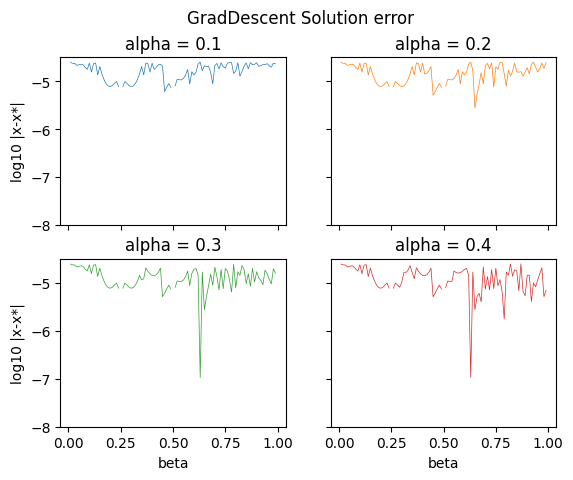

In [20]:

def plotSomeErrors(alphas= [0.1, 0.2, 0.3, 0.4], step=0.0001):
    betas = np.arange(step, 1, step)
    fig, axs = plt.subplots(2, 2)
    color = ['blue', 'orange', 'green', 'red']
    for i in range(4):
        output = [GradDescent(init0[0], f0, df0, stop_criterion=1e-4, alpha=alphas[i], beta=b) for b in betas]
        err = [s[0] for s in output]
        axs[i//2, i%2].plot(betas, np.log10(np.abs(err)), f'tab:{color[i]}', linewidth=0.5)
        axs[i//2, i%2].set_title(f'alpha = {alphas[i]}' )
        axs[i//2, i%2].set_ylim([-8, -4.5])
        print(f'Mean result with alpha={alphas[i]} is {np.mean(err)}')

    for ax in axs.flat:
        ax.set(xlabel='beta', ylabel='log10 |x-x*|')
    for ax in axs.flat:
        ax.label_outer()
    fig.suptitle(f'GradDescent Solution error')
    plt.savefig(f'errors_{step}.png')
plotSomeErrors(step=0.01)

## (b) Solve the second exercise

In [ ]:
solsGD = [GradDescent(x_0=x_0, f=f1, df=df1, stop_criterion=stop_criterion, alpha=0.1, beta=0.8) for x_0 in init1]
solsGD

[(-1.0574494887367, 22),
 (-1.0574495313319778, 24),
 (-1.0574501745206375, 24),
 (-1.0574501500215956, 26)]

## (c) Use Newton's Method

In [ ]:
ddf0 = lambda x: 4
ddf1 = lambda x: 24*x**2 - 8

from scipy.optimize import newton

sol0NM = newton(f0, init0[0], df0, full_output=True)
print(sol0NM)


(0.5,       converged: True
           flag: converged
 function_calls: 14
     iterations: 7
           root: 0.5)


In [ ]:
solsNM = [newton(f1, x_0, df1, full_output=True) for x_0 in init1]
for s in solsNM:
    print(s)

(-1.5570017664953795,       converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: -1.5570017664953795)
(1.3286443828543482,       converged: True
           flag: converged
 function_calls: 46
     iterations: 23
           root: 1.3286443828543482)
(1.3286443828543482,       converged: True
           flag: converged
 function_calls: 26
     iterations: 13
           root: 1.3286443828543482)
(1.3286443828543482,       converged: True
           flag: converged
 function_calls: 14
     iterations: 7
           root: 1.3286443828543482)
